In [2]:
import importlib
import Multinomial_Framework2
importlib.reload(Multinomial_Framework2)
from Multinomial_Framework2 import RandomForestWrapper, NN_Wrapper
from torch.utils.data import Dataset
from Multinomial_Framework2 import Diabetes_Predictor_NN, dataset
import torch
import torch.nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier as SklearnRFC
from sklearn.metrics import accuracy_score
from typing import Union, Tuple

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset')

Skipping, found downloaded files in "./diabetes-health-indicators-dataset" (use force=True to force download)


In [4]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [5]:
diabetes_df = pd.read_csv('diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
print(diabetes_df['Diabetes_012'].unique())

[0. 2. 1.]


In [7]:
print(diabetes_df['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [8]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
X = diabetes_df.drop(columns=['Diabetes_012'])
Y = diabetes_df['Diabetes_012']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify=y_test)

In [12]:
from Transform_Data import transform
X_train, X_val, X_test = transform(X_train,X_val,X_test)

In [13]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)
type(validation_data)

Multinomial_Framework2.dataset

In [14]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 32, shuffle = False)
testing_dataloader = DataLoader(testing_data, batch_size = 32, shuffle = False)

In [20]:
nn_model = Diabetes_Predictor_NN(X.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=1e-3)

nn_wrapper = NN_Wrapper(nn_model, criterion, optimizer, epochs=10, batch_size=256)
_, total_acc_train_plot = nn_wrapper.fit(X_train, y_train)
total_acc_test_plot = nn_wrapper.predict(testing_dataloader)

Epoch [1/10] | Loss: 80.0026 | Train Acc: 84.241
Epoch [2/10] | Loss: 64.3539 | Train Acc: 84.241
Epoch [3/10] | Loss: 56.6418 | Train Acc: 84.241
Epoch [4/10] | Loss: 52.8798 | Train Acc: 84.241
Epoch [5/10] | Loss: 50.8572 | Train Acc: 84.241
Epoch [6/10] | Loss: 49.664 | Train Acc: 84.241
Epoch [7/10] | Loss: 48.8678 | Train Acc: 84.241
Epoch [8/10] | Loss: 48.2554 | Train Acc: 84.241
Epoch [9/10] | Loss: 47.7771 | Train Acc: 84.241
Epoch [10/10] | Loss: 47.3749 | Train Acc: 84.241
Test Accuracy: 84.24% | Test Loss: 47.17


In [16]:
# Create an instance of your wrapper
rf = RandomForestWrapper(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Evaluate accuracy
results = rf.evaluate(X_test, y_test)
print(results)

{'accuracy': 83.594}


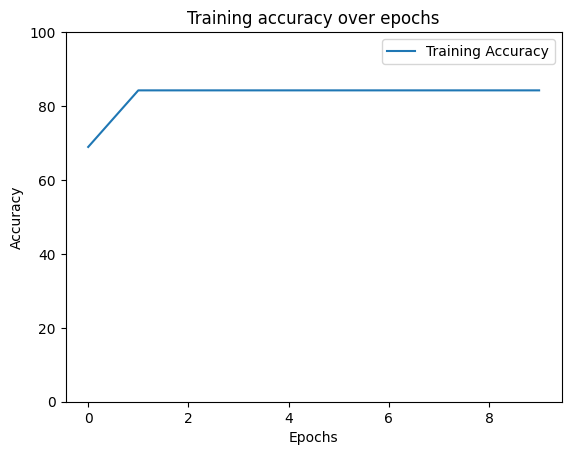

In [17]:
import matplotlib.pyplot as plt
plt.plot(total_acc_train_plot, label = 'Training Accuracy')

plt.title("Training accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0, 100])
plt.legend()

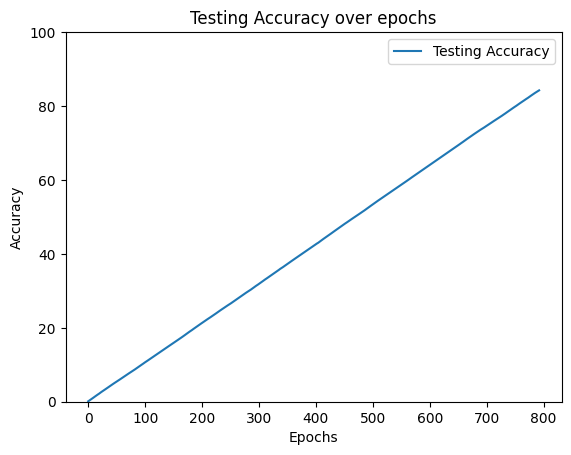

In [18]:
plt.plot(total_acc_test_plot, label = 'Testing Accuracy')
plt.title('Testing Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,100])
plt.legend()